In [41]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np

In [42]:
# Reading data
data = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/Data.csv')
data.head(5)

,ID,Title,Description,Upvotes,Submission Date,Status,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,...,scalability_potential_score,feature_adoption_likelihood,aligns_with_okrs,supports_key_initiative,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score
0,5bc6f374-2a65-4fee-800b-d687c917c1c1,Intelligent Machine Service,Intelligent Machine Service aims at enhancing ...,325,2024-07-27,Proposed,150,4,1,137812,...,3,4,True,NaN,True,1,True,True,False,2
1,912f2866-babd-4c47-a5f0-dae9ef883c1b,Cloud-Based Local Optimizer,Cloud-Based Local Optimizer aims at optimizing...,289,2025-01-23,On Hold,17,4,1,138331,...,2,5,False,Sustainability,True,1,False,True,True,2
2,98b214d5-3dbc-4603-a297-0b1b07752b10,Intelligent Establish Optimizer,Intelligent Establish Optimizer aims at enhanc...,410,2024-06-01,On Hold,116,2,1,135081,...,3,4,True,Automation,True,5,True,False,False,4
3,e78ca723-77d6-474c-b131-e5919976df9c,Cloud-Based Ten System,Cloud-Based Ten System aims at enhancing autom...,490,2024-08-05,Proposed,98,2,1,157218,...,5,3,False,AI,False,1,False,True,True,2
4,4febb6e4-79ba-4413-b068-6e5970dd7937,Automated Six Manager,Automated Six Manager aims at improving compli...,74,2024-09-26,Completed,178,4,3,107997,...,3,3,True,Sustainability,True,5,True,True,False,5


Taking Required Metrics for Evaluating Features Importance i.e. (giving weights to features according to importance instead manually assigning them) related to Cost Metric.

| Feature Name              | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| est_dev_time_days         | Estimated development time in days                                          |
| complexity_score          | Subjective complexity score (1-5 scale or categorical)                      |
| num_teams_required        | Number of cross-functional teams required                                   |
| resource_cost_usd         | Estimated cost of human resources in USD                                    |
| infra_dependencies_count  | Number of infrastructure or API dependencies                                |
| tech_risk_score           | Technical risk score (1-5)                                                  |
| design_effort_days        | Estimated time needed from UX/UI design in days                             |
| qa_effort_days            | Estimated QA and testing effort in days                                     |
| deployment_complexity     | Deployment difficulty level (e.g., Low, Medium, High)                       |
| integration_needed        | Whether the idea needs integration with external systems (True/False)       |


In [43]:
# Taking Cost Metric Features
df_cost = data[['Title','Description','est_dev_time_days', 'complexity_score', 'num_teams_required', 
                'resource_cost_usd', 'infra_dependencies_count', 'tech_risk_score', 
                'design_effort_days', 'qa_effort_days', 'deployment_complexity', 
                'integration_needed']].copy()
df_cost['deployment_complexity'] = df_cost['deployment_complexity'].replace({'High': 1, 'Medium': 0, 'Low': 0}).astype(int)
df_cost['integration_needed'] = df_cost['integration_needed'].astype(int)
df_cost.head(5)

/var/folders/jr/cx9v05mj76767q_pxc111nvr0000gn/T/ipykernel_12844/2934079348.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cost['deployment_complexity'] = df_cost['deployment_complexity'].replace({'High': 1, 'Medium': 0, 'Low': 0}).astype(int)


,Title,Description,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,design_effort_days,qa_effort_days,deployment_complexity,integration_needed
0,Intelligent Machine Service,Intelligent Machine Service aims at enhancing ...,150,4,1,137812,2,1,18,29,1,0
1,Cloud-Based Local Optimizer,Cloud-Based Local Optimizer aims at optimizing...,17,4,1,138331,3,4,9,38,0,0
2,Intelligent Establish Optimizer,Intelligent Establish Optimizer aims at enhanc...,116,2,1,135081,3,4,14,17,1,1
3,Cloud-Based Ten System,Cloud-Based Ten System aims at enhancing autom...,98,2,1,157218,1,1,8,34,0,0
4,Automated Six Manager,Automated Six Manager aims at improving compli...,178,4,3,107997,4,5,14,35,0,1


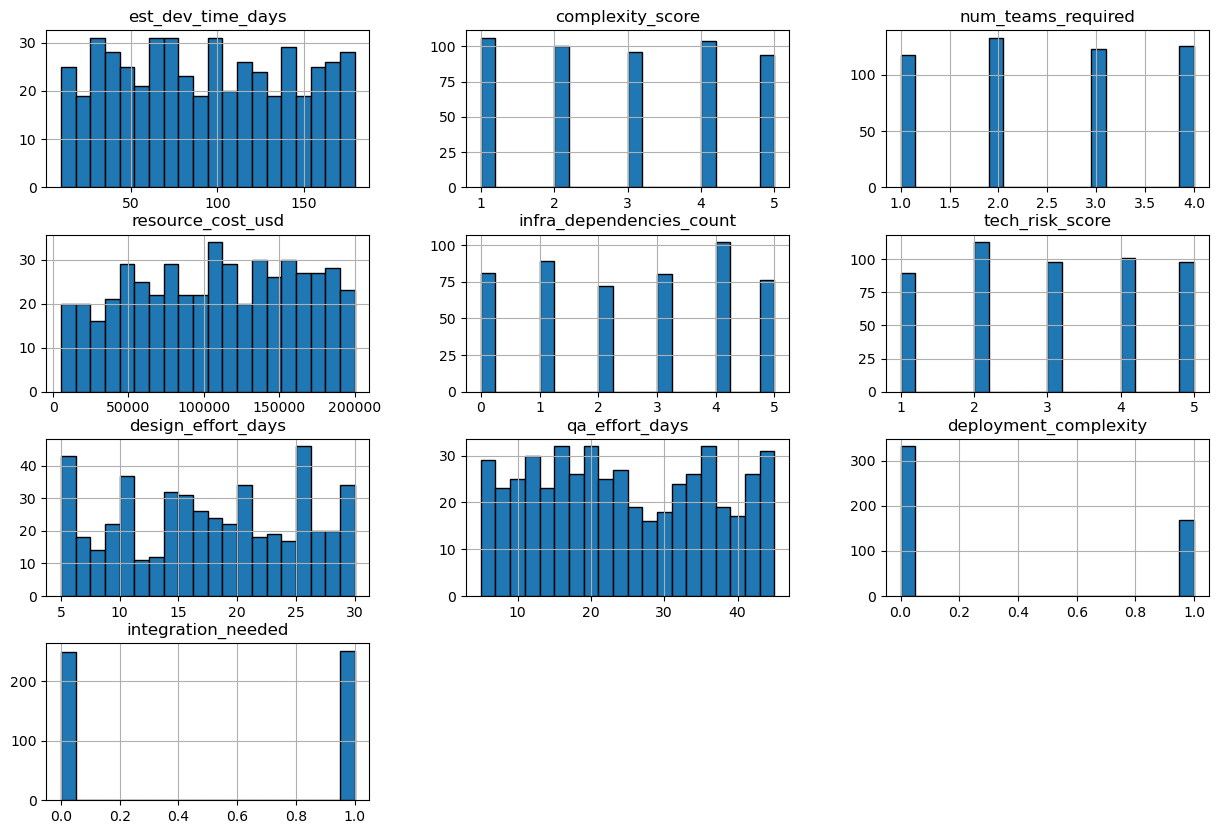

In [44]:
# Checking Skewness of the data 
df_cost.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

In [45]:
# Normalizing the Data based on Min-Max Scaling 
numerical_columns = df_cost.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_cost_normalized = df_cost.copy()
df_cost_normalized[numerical_columns] = scaler.fit_transform(df_cost[numerical_columns])

In [46]:
# Keeping the Target Label Randomly 
import numpy as np
df_cost_normalized['target'] = np.random.rand(len(df_cost_normalized))

In [47]:
# Train, Val and Test Split For Training Random Forest Model
from sklearn.model_selection import train_test_split

df_train,df_temp = train_test_split(df_cost_normalized, train_size=300, random_state=42)
df_val, df_test = train_test_split(df_cost_normalized, test_size=100, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Training the Model
X = df_train[numerical_columns]
y = df_train['target']


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X, y)

# Val Set
X_val = df_val[numerical_columns]
y_val = df_val['target']
y_pred = rf_regressor.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.03481693251097904


Feature importance indicates how much each feature contributes to the predictive power of the model.
Higher importance values mean the feature plays a bigger role in the model’s decisions.
This helps with model interpretability and can guide feature selection or engineering.

In [ ]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

importances_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                    Feature  Importance
3         resource_cost_usd    0.217268
0         est_dev_time_days    0.169150
6        design_effort_days    0.153109
7            qa_effort_days    0.144120
4  infra_dependencies_count    0.080449
1          complexity_score    0.075487
2        num_teams_required    0.058639
5           tech_risk_score    0.057065
9        integration_needed    0.024631
8     deployment_complexity    0.020082


In [53]:
import altair as alt

# Create a histogram for feature importance
chart = alt.Chart(importances_df).mark_bar().encode(
    x=alt.X('Feature', sort='-y', title='Features'),
    y=alt.Y('Importance', scale=alt.Scale(domain=[0, 1]), title='Importance'),
    tooltip=['Feature', 'Importance']
).properties(
    title='Feature Importance Histogram',
    width=600,
    height=400
)

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [54]:
feature_weights = pd.Series(feature_importances, index=X.columns)

In [ ]:
df_train['cost_target'] = df_train[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)


In [57]:
# Test Set
X_val = df_test[numerical_columns]
y_test = df_test['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.10856033451401131


In [58]:
# Assigning Weights to the Features for whole Dataset
df_all_Cost=df_cost_normalized.copy()
df_all_Cost['Cost_Score'] = df_all_Cost[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [59]:
df_all_Cost.head(1)

,Title,Description,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,design_effort_days,qa_effort_days,deployment_complexity,integration_needed,target,Cost_Score
0,Intelligent Machine Service,Intelligent Machine Service aims at enhancing ...,0.828402,0.75,0.0,0.680706,0.4,0.0,0.52,0.6,1.0,0.0,0.312297,0.562985


In [60]:
df_all_Cost.to_csv('df_all_Cost.csv', index=False)